# **F1 EXPLORATORY DATA ANALYSIS**

Data from: https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Frohanrao%2Fformula-1-world-championship-1950-2020%3Fselect%3Dcircuits.csv

## Importing required libraries and modules

In [1]:
import pandas as pd
import plotly.express as px
from scipy.stats import gaussian_kde
import numpy as np
import plotly.figure_factory as ff


## Loading Datasets from ..data\processed\


In [2]:
results = pd.read_csv(r'..\data\processed\results.csv')
drivers = pd.read_csv(r'..\data\processed\drivers.csv')
constructors = pd.read_csv(r'..\data\processed\constructors.csv')
races = pd.read_csv(r'..\data\processed\races.csv')
status = pd.read_csv(r'..\data\processed\status.csv')
circuits = pd.read_csv(r'..\data\processed\circuits.csv')

In [33]:
races.dtypes

raceId                 int64
year                   int64
round                  int64
circuitId              int64
name                  object
date          datetime64[ns]
time         timedelta64[ns]
dtype: object

## Fixing the data formats


In [4]:
# Converting results['fastestLapTime'] to timedelta format from object
results['fastestLapTime'] = pd.to_timedelta('00:' + results['fastestLapTime'])

# Converting drivers['dob'] to datetime from object
drivers['dob'] = pd.to_datetime(drivers['dob'])

# Converting races['date'] to datetime from object
races['date'] = pd.to_datetime(races['date'])

# Converting races['time'] to timedelta from object
races['time'] = pd.to_timedelta(races['time'])

## Merging the datasets

In [5]:
merged_data = (results.merge(drivers,on='driverId', how='left')
               .merge(constructors,on='constructorId', how='left')
               .merge(races,on='raceId', how='left')
               .merge(status,on='statusId', how='left')
               .merge(circuits, on='circuitId', how='left'))
merged_data

,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,laps,milliseconds,...,date,time,status,circuitRef,name,location,country,lat,lng,alt
0,18,1,1,1,1.0,1,1,10.0,58,5690616.0,...,2008-03-16,0 days 04:30:00,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10
1,18,2,2,5,2.0,2,2,8.0,58,5696094.0,...,2008-03-16,0 days 04:30:00,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10
2,18,3,3,7,3.0,3,3,6.0,58,5698779.0,...,2008-03-16,0 days 04:30:00,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10
3,18,4,4,11,4.0,4,4,5.0,58,5707797.0,...,2008-03-16,0 days 04:30:00,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10
4,18,5,1,3,5.0,5,5,4.0,58,5708630.0,...,2008-03-16,0 days 04:30:00,Finished,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,1144,825,210,14,16.0,16,16,0.0,57,NaN,...,2024-12-08,0 days 13:00:00,+1 Lap,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3
26755,1144,859,215,12,17.0,17,17,0.0,55,NaN,...,2024-12-08,0 days 13:00:00,Engine,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3
26756,1144,822,15,9,NaN,R,18,0.0,30,NaN,...,2024-12-08,0 days 13:00:00,Collision damage,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3
26757,1144,861,3,20,NaN,R,19,0.0,26,NaN,...,2024-12-08,0 days 13:00:00,Engine,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,3


## Finding datatypes of columns

In [6]:
merged_data.dtypes

raceId                       int64
driverId                     int64
constructorId                int64
grid                         int64
position                   float64
positionText                object
positionOrder                int64
points                     float64
laps                         int64
milliseconds               float64
fastestLap                 float64
rank                       float64
fastestLapTime     timedelta64[ns]
fastestLapSpeed            float64
statusId                     int64
driverRef                   object
number                     float64
code                        object
forename                    object
surname                     object
dob                 datetime64[ns]
nationality_x               object
constructorRef              object
name_x                      object
nationality_y               object
year                         int64
round                        int64
circuitId                    int64
name_y              

## Numerical Column Describe

In [7]:
merged_data[['laps','fastestLap','fastestLapTime','fastestLapSpeed','dob','date']].describe()

,laps,fastestLap,fastestLapTime,fastestLapSpeed,dob,date
count,26759.000000,8252.000000,8252,8252.000000,26759,26759
mean,46.301768,42.732913,0 days 00:01:30.827595249,204.116330,1961-12-05 03:08:27.328375488,1991-12-03 01:27:10.688740224
min,0.000000,1.000000,0 days 00:00:55.404000,89.540000,1896-12-28 00:00:00,1950-05-13 00:00:00
25%,23.000000,33.000000,0 days 00:01:20.848250,193.322500,1946-05-04 00:00:00,1977-05-08 00:00:00
50%,53.000000,46.000000,0 days 00:01:30.267500,204.894000,1961-10-09 00:00:00,1991-09-08 00:00:00
75%,66.000000,54.000000,0 days 00:01:39.476750,217.324000,1980-08-06 00:00:00,2009-05-10 00:00:00
max,200.000000,85.000000,0 days 00:03:22.300000,257.320000,2005-05-08 00:00:00,2024-12-08 00:00:00
std,29.496557,16.603460,0 days 00:00:12.338955961,21.377265,NaN,NaN


This shows numerical data about the laps, fastest lap, lap times, lap speeds, date of birth of the drivers and the dates of the races.

Fastest Average Lap Speed in a race: 257.32 kmph

First race: 13th May 1950

## DOB Analysis

<Axes: >

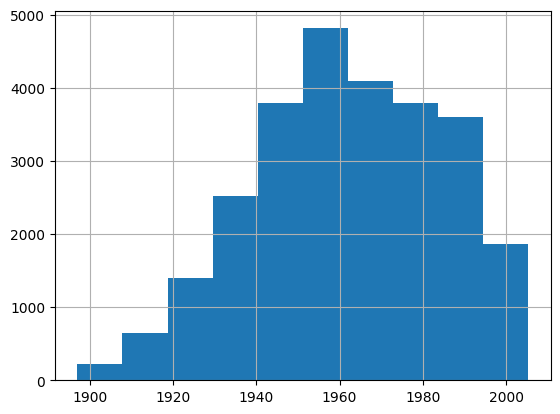

In [8]:
merged_data['dob'].hist() # Matplotlib

In [9]:
px.histogram(merged_data,x='dob') # plotly

This bar plot shows when F1 drivers were born.

## Top 20 Drivers by Points

In [10]:
grouped_points_drivers = merged_data.groupby(['driverId','driverRef','surname','code'], as_index=False)['points'].sum()
top20_drivers = grouped_points_drivers.sort_values(['points'],ascending=False).head(20)
px.bar(top20_drivers,x='code',y='points')

Lewis Hamilton is leading with 4820.5 points as of the 2024 season. with Vettel and Verstappen having a close tie for 2nd with about 3000 points each.

## Top 10 Constructors by Points

In [11]:
grouped_points_constructors = merged_data.groupby('constructorRef',as_index= False)['points'].sum()
top10_constructors = grouped_points_constructors.sort_values('points',ascending=False).head(10)
px.bar(top10_constructors,x='constructorRef',y='points')

Ferrari have accumulated the most points (11091), followed by Mercedes (7730) and RedBull(7673).

## Top 20 Drivers by Wins

In [12]:
wins_drivers = merged_data[merged_data['position']==1].groupby('driverRef').size().reset_index(name='wins')
top20_drivers_wins = wins_drivers.sort_values('wins',ascending=False).head(20)
px.bar(top20_drivers_wins,x='driverRef',y='wins')

Hamilton has the most wins with 105 wins, followed by Schumacher with 91 wins.

## Top 10 Constructors by Wins

In [13]:
wins_constructors = merged_data[merged_data['position']==1].groupby('constructorRef').size().reset_index(name='wins')
top10_constructors_wins = wins_constructors.sort_values('wins',ascending=False).head(10)
px.bar(top10_constructors_wins,x='constructorRef',y='wins')

Ferrari has the most constructor wins with 249 wins, followed by Mclaren with 185 wins.

## Driver Points by Position

In [14]:
grouped_position_drivers = merged_data.groupby(['driverRef','position','code'], as_index=False)['points'].sum()
grouped_top40_drivers = grouped_position_drivers[(grouped_position_drivers['driverRef'].isin(top20_drivers.head(20)['driverRef'])) & (grouped_position_drivers['position'].between(1,10))]
driver_order = top20_drivers['code'].tolist()
px.bar(grouped_top40_drivers,x='code',y='points',color='position',category_orders={'code':driver_order,'position':list(range(1,11))})

We can infer that drivers like Hamilton, Vettel, Verstappen, Rosber, Schumacher scored most of their points by coming in 1st place.\
Whereas drivers like Alonso, Raikkonnen, Bottas, Perez all scored most of their points by finishing 2nd.

## Number of Drivers by Country

In [15]:
drivers_per_country = merged_data.groupby('nationality_x')['driverId'].nunique().reset_index(name='num_drivers').sort_values('num_drivers',ascending=False)
px.bar(drivers_per_country.head(20),x='nationality_x',y='num_drivers')



We notice that most of the drivers are of British or American origin, with 166 and 158 drivers from each nation respectively.\
Other countries producing the most F1 drivers are Italy, France and Germany.

## Occurence of Various Status

In [16]:
race_outcomes = merged_data.groupby('status')['driverId'].nunique().reset_index(name='num_occured').sort_values('num_occured', ascending=False)
top_20_outcomes = race_outcomes.head(20)
px.bar(top_20_outcomes, x='status', y='num_occured', title='Top 20 Race Outcomes by Number of Occurrences')



Shows the most occuring status outcomes in races. 


## Seeing unique values in positionText column

In [17]:
unique_positionText = merged_data['positionText'].unique()
unique_positionText

array(['1', '2', '3', '4', '5', '6', '7', '8', 'R', 'D', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', 'N',
       'W', 'F', 'E', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33'], dtype=object)

The various possible driver results in a race are shown.

## Number of Fastest Laps by Drivers

In [18]:
fastest_laps = merged_data[merged_data['rank']==1]
fastest_laps_drivers = (fastest_laps.groupby(['driverId','code','driverRef']).size().reset_index(name='num_fastest_laps').sort_values('num_fastest_laps',ascending=False).head(20))
px.bar(fastest_laps_drivers,x='code',y='num_fastest_laps')

Hamilton has recorded the most number of fastest laps, with Raikkonnen and Vettel following.

## Number of Pole Positions by Driver

In [19]:
pole_positions = merged_data[merged_data['grid']==1]
pole_positions_drivers = (pole_positions.groupby(['driverId','code','driverRef']).size().reset_index(name='num_poles').sort_values('num_poles',ascending=False).head(20))
px.bar(pole_positions_drivers,x='code',y='num_poles')

Hamilton has the most pole positions, followed by Schumacher and Vettel.

## Circuits Over The World

In [20]:
circuit_race_counts = merged_data.groupby('circuitId')['raceId'].nunique().reset_index(name='num_races')
circuit_info = merged_data.drop_duplicates(subset=['circuitId'])[['circuitId','lat','lng','name','country']]
circuit_data = pd.merge(circuit_info, circuit_race_counts, on='circuitId')
px.scatter_geo(circuit_data,lat = 'lat',lon='lng',hover_name='name',color='country',size='num_races',projection='natural earth')

Shows that Monza is the circuit with the most number of races held (74), closely followed by Monaco (70).

## Lap Numbers During Fastest Lap

In [21]:
px.scatter(fastest_laps,x='date',y='fastestLap', color='code')

This scatterplot shows at which lap number the fastest lap of each race in a year were recorded. We can see a general increased density in the 40 to 70 lap range.
This data is shown more clearly in a KDE plot below.

## KDE for Lap Number at which Fastest Lap is Recorded

<Axes: ylabel='Density'>

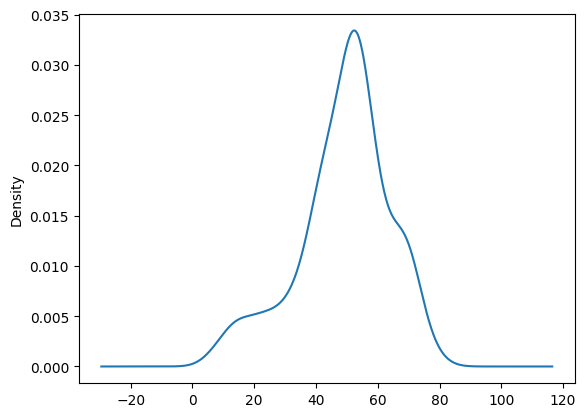

In [22]:
fastest_laps['fastestLap'].plot.kde()

We can infer that most of the Fastest Laps are recorded between laps 30 to 70, indicating that drivers attempt the fastest laps towards the middle and end of the race

In [23]:
hist_data = [fastest_laps['fastestLap']]
ff.create_distplot(hist_data,['KDE for Fastest Lap speeds'])

KDE plot with histogram for the lap number at which fastest lap was grabbed. We can see it peaks around 52 laps.

## Average speed of Fastest Laps Over the Years

In [24]:
fastest_laps_yearly = fastest_laps.groupby('year',as_index=False)['fastestLapSpeed'].max()
px.line(fastest_laps_yearly, x='year',y='fastestLapSpeed',markers=True)

The average speed during the fastest recorded laps of the years are shown. It shows a lot of dips, increases and plateaus which can be explained by changes in FIA regulations.

In [25]:
lapSpeed_yearly =  merged_data[np.isfinite(merged_data['fastestLapSpeed'])].groupby('year',as_index=False)['fastestLapSpeed'].apply(list).reset_index()
hist_data = lapSpeed_yearly['fastestLapSpeed'].tolist()
group_labels = lapSpeed_yearly['year'].astype(str).tolist()
ff.create_distplot(hist_data,group_labels,show_hist = False, show_rug = False, curve_type='kde')

Shows the average speeds of fastest laps during multiple years.

Plotting the Modes of each KDE graph

In [26]:
modes = []
years =[]
for year, speeds in zip(group_labels, hist_data):
    speeds_array = np.array(speeds)
    kde = gaussian_kde(speeds_array)
    x_eval = np.linspace(speeds_array.min(), speeds_array.max(), 1000)
    kde_values = kde(x_eval)
    mode_idx = np.argmax(kde_values)
    mode_value = x_eval[mode_idx]
    modes.append(mode_value)
    years.append(int(year))

px.line(x=years,y=modes,markers=True,title='speeds over the years')


The Mode lap speed trend over the years is seen in the above line graph. 
2020 having the highest mode lap speed.

Plotting the Means of the speeds

In [27]:
# Using mean
lapSpeed_mean = merged_data[np.isfinite(merged_data['fastestLapSpeed'])].groupby('year',as_index=False)['fastestLapSpeed'].mean()
px.line(lapSpeed_mean,x='year',y='fastestLapSpeed',markers=True, title='Mean of Fastest Lap Speeds')


This shows that mean lap speed over the years follows a decreasing trend from 2004 to 2014, which slight increases during 2009 and 2013. After 2014, it is on a constant rise till 2022 when it dips to 205 kmph, then increases again.\
This depicts the changes in lap speeds due to changing FIA regulations, which introduce new engines, new weight requirements, fuel specifications, chassis requirements, etc.

## Summary

This analysis covers the evolution of Formula 1 from 1950 to 2024 using the Kaggle F1 World Championship dataset. After merging and cleaning all relevant files, I explored trends in driver and constructor performance, race outcomes, fastest laps, and the impact of regulations.

- **Drivers & Constructors:**  
  Hamilton leads in total points and wins, with Vettel and Verstappen close behind. Ferrari is the top constructor by points and wins, followed by Mercedes and Red Bull.

- **Points and Wins:**  
  Most top drivers scored the majority of their points by finishing first. Others, like Alonso and Bottas, accumulated points with consistent podiums. Hamilton has the most wins (105), and Ferrari leads constructors with 249 wins.

- **Nationalities:**  
  The majority of F1 drivers are British or American, with Italy, France, and Germany also contributing large numbers. This highlights the influence of motorsport culture and infrastructure in these countries.

- **Race Outcomes:**  
  The most common race statuses are “Finished”, “Accident”, and “Engine”, reflecting reliability and risk factors over the decades.

- **Fastest Laps & Lap Numbers:**  
  Most fastest laps are recorded between laps 30 and 70, usually in the middle or end of races. Hamilton leads in fastest laps, with Raikkonen and Vettel following.

- **Lap Speeds & Regulation Changes:**  
  Both the mode and mean of fastest lap speeds show clear trends linked to FIA regulation changes. There’s a drop in speeds after 2004, a plateau, and then a rise until 2022, when new rules brought speeds down again. These shifts align with changes in engines, car weight, fuel, and aero rules.

Overall, the data shows how F1 is shaped by a mix of driver skill, team strategy, technical innovation, and constant regulatory change. The numbers reflect the stories behind the sport—how champions are made, how teams rise and fall, and how the pace of F1 keeps evolving.
